In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import norm
import math

df = pd.read_csv("Dataset1A.csv")
display(df)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


## 1. Membuat rangkuman statistika kuantitatif atas tiga data parameter numerik #views, #likes, dan #dislikes dari semua data video.

### 1a. Ukuran Pusat: Rata-rata, Median, Modus

In [130]:
# Menghitung rata-rata
df_num_parameter = df[["views", "likes", "dislikes", "comment_count"]]
rata_rata = df_num_parameter.mean()
print(f"Rata-rata views = {rata_rata[0]}\nRata-rata likes = {rata_rata[1]}\nRata-rata dislikes = {rata_rata[2]}")

Rata-rata views = 2360784.6382573447
Rata-rata likes = 74266.7024347359
Rata-rata dislikes = 3711.400888910596


In [131]:
# Mencari median
median = df_num_parameter.median()
print(f"Median views = {median[0]}\nMedian likes = {median[1]}\nMedian dislikes = {median[2]}")

Median views = 681861.0
Median likes = 18091.0
Median dislikes = 631.0


In [132]:
# Menghitung modus
modus_views = df_num_parameter["views"].mode()
modus_likes = df_num_parameter["likes"].mode()
modus_dislikes = df_num_parameter["dislikes"].mode()
print(f"Modus views = {modus_views[0]}\nModus likes = {modus_likes[0]}\nModus dislikes = {modus_dislikes[0]}")

Modus views = 2078
Modus likes = 0
Modus dislikes = 0


### 1b. Ukuran Variasi: Standar Deviasi

In [133]:
# Menghitung standar deviasi
std_deviasi = df_num_parameter.std()
print(f"Standar deviasi views = {std_deviasi[0]}\nStandar deviasi likes = {std_deviasi[1]}\nStandar deviasi dislikes = {std_deviasi[2]}")

Standar deviasi views = 7394113.759703945
Standar deviasi likes = 228885.33820949908
Standar deviasi dislikes = 29029.70594500179


### 1c. Ukuran Lokasi: Kuartil, Jangkauan Inter Kuartil, Pencilan

In [152]:
# Menghitung kuartil ke-1 dari setiap kolom
q1 = df_num_parameter.quantile(q=0.25)

# Menghitung kuartil ke-2 (median) dari setiap kolom
q2 = df_num_parameter.quantile(q=0.5)

# Menghitung kuartil ke-3 dari setiap kolom
q3 = df_num_parameter.quantile(q=0.75)

print(f"Kuartil ke-1 dari views = {q1[0]}\nKuartil ke-2 dari views = {q2[0]}\nKuartil ke-3 dari views = {q3[0]}\n")
print(f"Kuartil ke-1 dari likes = {q1[1]}\nKuartil ke-2 dari likes = {q2[1]}\nKuartil ke-3 dari likes = {q3[1]}\n")
print(f"Kuartil ke-1 dari dislikes = {q1[2]}\nKuartil ke-2 dari dislikes = {q2[2]}\nKuartil ke-3 dari dislikes = {q3[2]}\n")
print(f"Kuartil ke-1 dari comment = {q1[3]}\nKuartil ke-2 dari comment = {q2[3]}\nKuartil ke-3 dari comment = {q3[3]}")

Kuartil ke-1 dari views = 242329.0
Kuartil ke-2 dari views = 681861.0
Kuartil ke-3 dari views = 1823157.0

Kuartil ke-1 dari likes = 5424.0
Kuartil ke-2 dari likes = 18091.0
Kuartil ke-3 dari likes = 55417.0

Kuartil ke-1 dari dislikes = 202.0
Kuartil ke-2 dari dislikes = 631.0
Kuartil ke-3 dari dislikes = 1938.0

Kuartil ke-1 dari comment = 614.0
Kuartil ke-2 dari comment = 1856.0
Kuartil ke-3 dari comment = 5755.0


In [135]:
# Menghitung jangkauan inter kuartil
iqr = q3 - q1

print(f"Jangkauan inter kuartil dari views = {iqr[0]}\nJangkauan inter kuartil dari likes = {iqr[1]}\nJangkauan inter kuartil dari dislikes = {iqr[2]}\nJangkauan inter kuartil dari comment = {iqr[3]}")

Jangkauan inter kuartil dari views = 1580828.0
Jangkauan inter kuartil dari likes = 49993.0
Jangkauan inter kuartil dari dislikes = 1736.0
Jangkauan inter kuartil dari comment = 5141.0


In [136]:
# Mencari pencilan
batas_bawah = q1 - 1.5*iqr
batas_atas = q3 + 1.5*iqr

pencilan_bawah = df_num_parameter[(df_num_parameter < batas_bawah)]
pencilan_atas = df_num_parameter[(df_num_parameter > batas_atas)]

# List yang berisi data pencilan dari views
pencilan_bawah_views = pencilan_bawah["views"].dropna().to_list()
pencilan_atas_views = pencilan_atas["views"].dropna().to_list()

# List yang berisi data pencilan dari likes
pencilan_bawah_likes = pencilan_bawah["likes"].dropna().to_list()
pencilan_atas_likes = pencilan_atas["likes"].dropna().to_list()

# List yang berisi data pencilan dari dislikes
pencilan_bawah_dislikes = pencilan_bawah["dislikes"].dropna().to_list()
pencilan_atas_dislikes = pencilan_atas["dislikes"].dropna().to_list()

# List yang berisi data pencilan dari comment
pencilan_bawah_comment = pencilan_bawah["comment_count"].dropna().to_list()
pencilan_atas_comment = pencilan_atas["comment_count"].dropna().to_list()


print(f"Jumlah data pencilan bawah dan pencilan atas dari views adalah {len(pencilan_bawah_views)} + { len(pencilan_atas_views)} = {len(pencilan_bawah_views)+len(pencilan_atas_views)} data, dengan batas bawah = {batas_bawah[0]} dan batas atas = {batas_atas[0]}")
print(f"Jumlah data pencilan bawah dan pencilan atas pencilan dari likes adalah {len(pencilan_bawah_likes)} + {len(pencilan_atas_likes)} = {len(pencilan_bawah_likes)+len(pencilan_atas_likes)} data, dengan batas bawah = {batas_bawah[1]} dan batas atas = {batas_atas[1]}")
print(f"Jumlah data pencilan bawah dan pencilan atas pencilan dari dislikes adalah {len(pencilan_bawah_dislikes)} + {len(pencilan_atas_dislikes)} = {len(pencilan_bawah_dislikes)+len(pencilan_atas_dislikes)} data, dengan batas bawah = {batas_bawah[2]} dan batas atas = {batas_atas[2]}")
print(f"Jumlah data pencilan bawah dan pencilan atas pencilan dari comment adalah {len(pencilan_bawah_comment)} + {len(pencilan_atas_comment)} = {len(pencilan_bawah_comment)+len(pencilan_atas_comment)} data, dengan batas bawah = {batas_bawah[3]} dan batas atas = {batas_atas[3]}")

Jumlah data pencilan bawah dan pencilan atas dari views adalah 0 + 4499 = 4499 data, dengan batas bawah = -2128913.0 dan batas atas = 4194399.0
Jumlah data pencilan bawah dan pencilan atas pencilan dari likes adalah 0 + 5136 = 5136 data, dengan batas bawah = -69565.5 dan batas atas = 130406.5
Jumlah data pencilan bawah dan pencilan atas pencilan dari dislikes adalah 0 + 5288 = 5288 data, dengan batas bawah = -2402.0 dan batas atas = 4542.0
Jumlah data pencilan bawah dan pencilan atas pencilan dari comment adalah 0 + 5089 = 5089 data, dengan batas bawah = -7097.5 dan batas atas = 13466.5


### 2a. Histogram yang menunjukan persebaran views, likes, dislikes

In [137]:
display(df[['category_id', 'views', 'likes', 'dislikes']])

,category_id,views,likes,dislikes
0,22,748374,57527,2966
1,24,2418783,97185,6146
2,23,3191434,146033,5339
3,24,343168,10172,666
4,24,2095731,132235,1989
...,...,...,...,...
40944,15,1685609,38160,1385
40945,22,1064798,60008,382
40946,24,1066451,48068,1032
40947,1,5660813,192957,2846


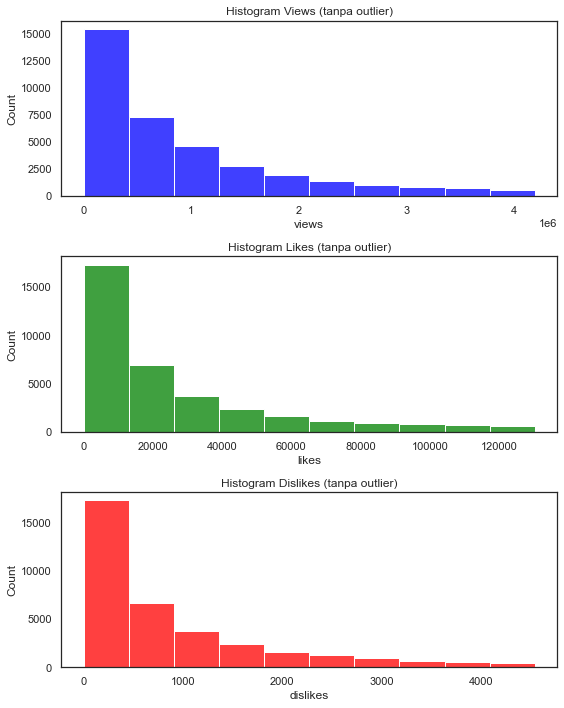

In [138]:
# hitung batas outlier
Q1 = df[['views', 'likes', 'dislikes']].quantile(0.25)
Q3 = df[['views', 'likes', 'dislikes']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = (Q1 - 1.5*IQR).astype(int)
upper_bound = (Q3 + 1.5*IQR).astype(int)

# buat subplot
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# plot histogram untuk kolom views
views = df[(df['views'] >= lower_bound['views']) & (df['views'] <= upper_bound['views'])]['views']
sns.histplot(ax=axs[0], data=views, bins=10, color='blue')
axs[0].set_title('Histogram Views (tanpa outlier)')

# plot histogram untuk kolom likes
likes = df[(df['likes'] >= lower_bound['likes']) & (df['likes'] <= upper_bound['likes'])]['likes']
sns.histplot(ax=axs[1], data=likes, bins=10, color='green')
axs[1].set_title('Histogram Likes (tanpa outlier)')

# plot histogram untuk kolom dislikes
dislikes = df[(df['dislikes'] >= lower_bound['dislikes']) & (df['dislikes'] <= upper_bound['dislikes'])]['dislikes']
sns.histplot(ax=axs[2], data=dislikes, bins=10, color='red')
axs[2].set_title('Histogram Dislikes (tanpa outlier)')

# tampilkan plot
plt.tight_layout()
plt.show()

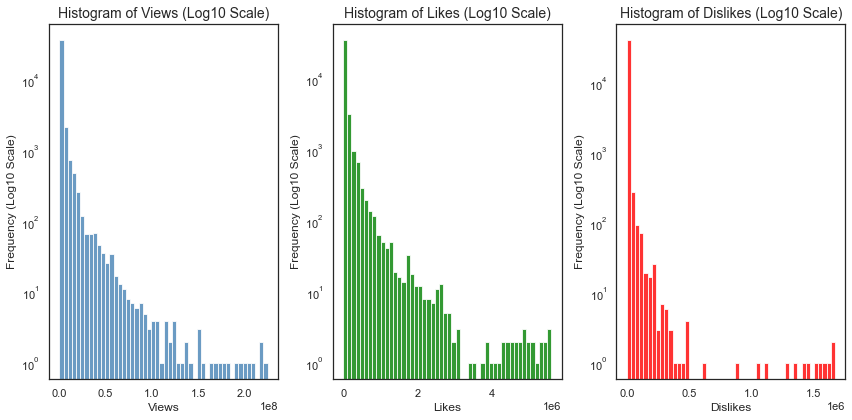

In [139]:
# set the figure size
plt.figure(figsize=(12, 6))

# create histogram for views
plt.subplot(1, 3, 1)
plt.hist(df['views'], bins=50, color='steelblue', alpha=0.8)
plt.xscale('linear')
plt.yscale('log')
plt.title('Histogram of Views (Log10 Scale)', fontsize=14)
plt.xlabel('Views', fontsize=12)
plt.ylabel('Frequency (Log10 Scale)', fontsize=12)

# create histogram for likes
plt.subplot(1, 3, 2)
plt.hist(df['likes'], bins=50, color='green', alpha=0.8)
plt.xscale('linear')
plt.yscale('log')
plt.title('Histogram of Likes (Log10 Scale)', fontsize=14)
plt.xlabel('Likes', fontsize=12)
plt.ylabel('Frequency (Log10 Scale)', fontsize=12)

# create histogram for dislikes
plt.subplot(1, 3, 3)
plt.hist(df['dislikes'], bins=50, color='red', alpha=0.8)
plt.xscale('linear')
plt.yscale('log')
plt.title('Histogram of Dislikes (Log10 Scale)', fontsize=14)
plt.xlabel('Dislikes', fontsize=12)
plt.ylabel('Frequency (Log10 Scale)', fontsize=12)

# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()


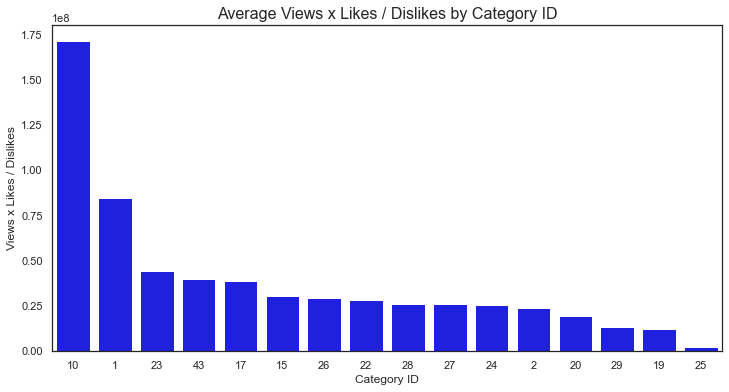

In [140]:
# calculate views*likes/dislikes for each category_id
df_bar = df.groupby('category_id')[['views', 'likes', 'dislikes']].mean()
df_bar['val'] = df_bar['views'] * df_bar['likes'] / df_bar['dislikes']

# sort by 'val' column
df_bar = df_bar.sort_values('val', ascending=False)

# create barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_bar.index, y='val', data=df_bar, color='blue', order=df_bar.index)

# set title and labels
plt.title('Average Views x Likes / Dislikes by Category ID', fontsize=16)
plt.xlabel('Category ID', fontsize=12)
plt.ylabel('Views x Likes / Dislikes', fontsize=12)

plt.show()


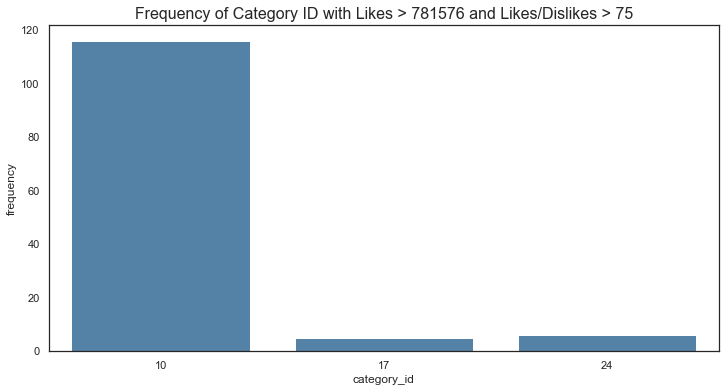

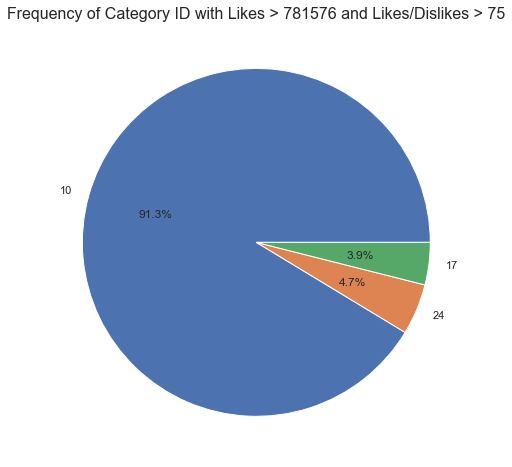

,category_id,frequency
0,10,116
1,24,6
2,17,5


In [141]:
#Visualisasi untuk pertanyaan diskusi tentang video berkualitas
#Hasil visualisasi akan menunjukan category_id yang memenuhi syarat video berkualitas
#syarat video berkualitas adalah likes top 0.1% dan perbandingan likes dan dislikes adalah 75:1

# filter data
df_filtered = df[(df['likes'] > 781576) & (df['likes']/df['dislikes'] > 75)]

# count frequency for each category_id
freq_table = pd.DataFrame(df_filtered['category_id'].value_counts())


# sort by frequency in descending order
freq_table = freq_table.sort_values(by='category_id', ascending=False)

# reset index to make category_id a regular column
freq_table = freq_table.reset_index()

# rename columns
freq_table.columns = ['category_id', 'frequency']

# create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='category_id', y='frequency', data=freq_table, color='steelblue')
plt.title('Frequency of Category ID with Likes > 781576 and Likes/Dislikes > 75', fontsize=16)



# create pie chart
plt.figure(figsize=(8, 8))
plt.pie(freq_table['frequency'], labels=freq_table['category_id'], autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'})

# set title
plt.title('Frequency of Category ID with Likes > 781576 and Likes/Dislikes > 75', fontsize=16)

# set background color to white
plt.rcParams['axes.facecolor'] = 'white'

plt.show()


plt.show()
freq_table.columns = ['category_id', 'frequency']

# show the table
display(freq_table)

### 2b. Pembuatan boxplot untuk melihat persebaran data dan pencilan 

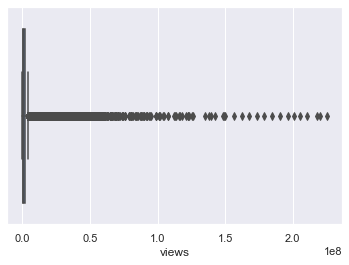

In [142]:
sns.set_theme()
_ = sns.boxplot(data=df, x=df['views'])

c:\Users\wesle\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


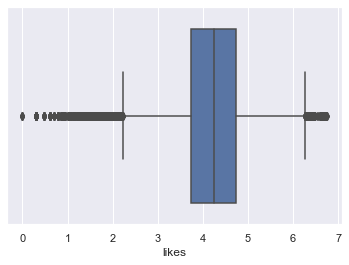

In [143]:
_= sns.boxplot(data=df, x=np.log10(df['likes']))

c:\Users\wesle\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


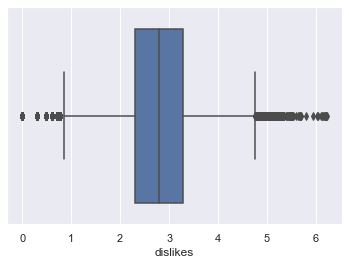

In [144]:
_ = sns.boxplot(data=df, x=np.log10(df['dislikes']))

In [145]:
modus_likes = df['likes'].mode()[0]

print("Modus dari kolom 'likes' adalah:", modus_likes)
modus_dislikes = df['dislikes'].mode()[0]

print("Modus dari kolom 'dislikes' adalah:", modus_dislikes)
modus_views = df['views'].mode()[0]

print("Modus dari kolom 'views' adalah:", modus_views)

Modus dari kolom 'likes' adalah: 0
Modus dari kolom 'dislikes' adalah: 0
Modus dari kolom 'views' adalah: 2078


### 3a. rata rata views per kelompok category_id 

In [146]:
df_category_id = df[['category_id','views']]
category_id = df_category_id.groupby('category_id')
category_id_mean = category_id.mean()
category_id_mean

,views
category_id,
1,3.106250e+06
2,1.355965e+06
10,6.201003e+06
15,8.311435e+05
17,2.025969e+06
19,8.546196e+05
20,2.620831e+06
22,1.531835e+06
23,1.480308e+06


In [147]:
category_id_mean = df_category_id.groupby('category_id').mean()

# sort the values in descending order based on views
category_id_mean = category_id_mean.sort_values(by='views', ascending=False)

# print the result
display(category_id_mean)

,views
category_id,
10,6.201003e+06
1,3.106250e+06
29,2.963884e+06
20,2.620831e+06
24,2.067883e+06
17,2.025969e+06
22,1.531835e+06
23,1.480308e+06
28,1.452627e+06


### 3b. Histogram dan boxplot untuk perbandingan persebaran data

[1, 2, 10, 43, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29]


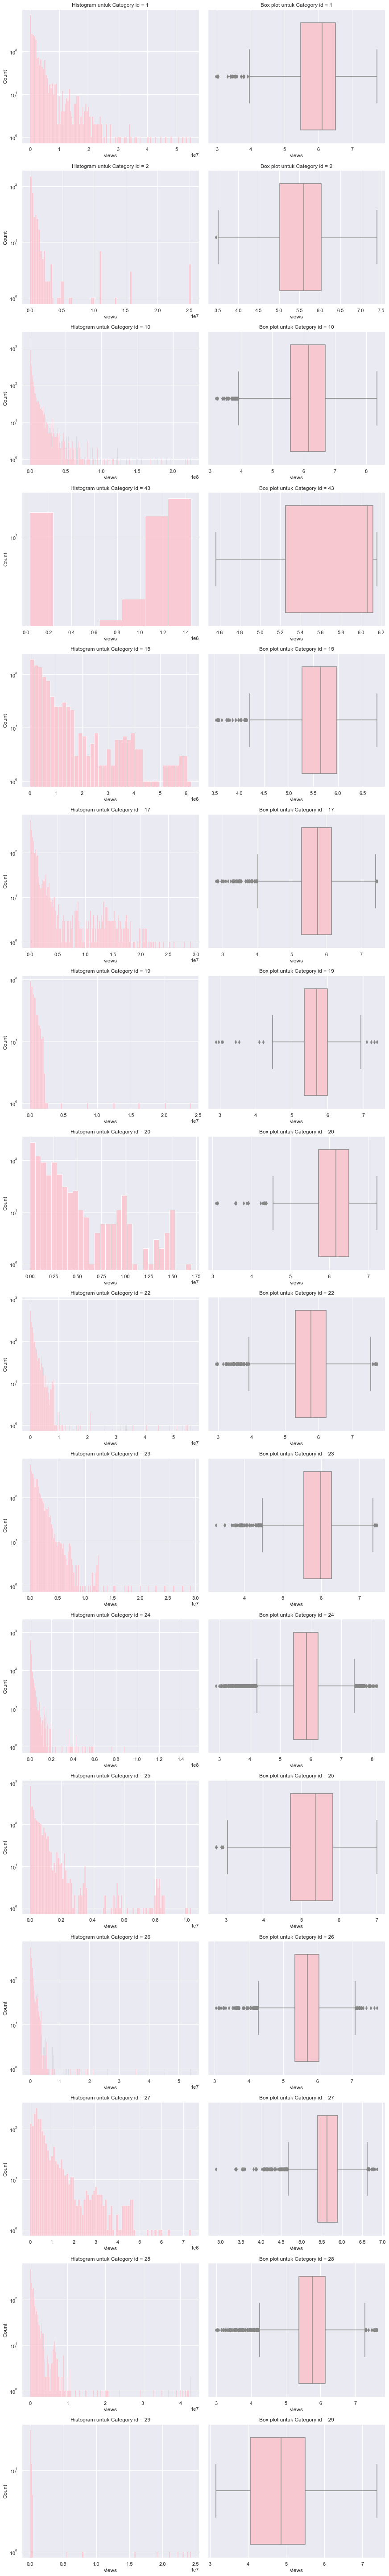

In [148]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

category_id_list = df['category_id'].to_list()
id_list = list(set(category_id_list))
print(id_list)

fig, axs = plt.subplots(len(id_list), 2, figsize=(12, 5*len(id_list)), constrained_layout=True)
axs = axs.flatten()

for i in range(len(id_list)):
    data = category_id.get_group(id_list[i])
    
    sns.set_theme()
    sns.set_style("white")
    
    sns.histplot(data=data, x=data['views'], color='pink', ax=axs[2*i], log_scale=(False, True))
    axs[2*i].set_title(f"Histogram untuk Category id = {id_list[i]}")
    
    sns.boxplot(data=data, x=np.log10(data['views']), color='pink', ax=axs[2*i+1])
    axs[2*i+1].set_title(f"Box plot untuk Category id = {id_list[i]}")

plt.show()


###  4 a Solusi diskusi dengan Distribusi Normal Standar

In [149]:
from scipy.stats import norm
import math
v = (10**8 - rata_rata[0])/std_deviasi[0]
print(rata_rata[0],std_deviasi[0], v)
print((1-norm.cdf(v, 0, 1)))
count = (df['views'] > 10**8).sum()
sample = len(df)
# Print the result
print(f'Number of videos with views above 100 million: {count} dan total videos {sample} probability {count/sample}')#0.000006 = 0

2360784.6382573447 7394113.759703945 13.204992313460439
0.0
Number of videos with views above 100 million: 40 dan total videos 40949 probability 0.000976824830887201


In [150]:
z = norm.ppf(0.999,0,1)
print(z)
print(f'Untuk bisa video like top 0.1% dibutuhkan like sebanyak {z*std_deviasi[1]+rata_rata[1]}')
'''tes = (781575.5689778763-rata_rata[1])/std_deviasi[1]
print(norm.cdf(tes,0,1))
count = (df['views'] > 781575).sum()*100/40379 
print(count)'''

3.090232306167813
Untuk bisa video like top 0.1% dibutuhkan like sebanyak 781575.5689778761


"tes = (781575.5689778763-rata_rata[1])/std_deviasi[1]\nprint(norm.cdf(tes,0,1))\ncount = (df['views'] > 781575).sum()*100/40379 \nprint(count)"

### 4 b Jawaban diskusi video berkualitas

In [151]:
#syarat kualitas baik video favorit sekaligus perbandingan antara likes/dislikes = 75
syt = ( df['likes']>= 781575.5689778763 ).sum()
print(syt)
df['like_dislike_ratio'] = df.apply(lambda row: row['likes'] / row['dislikes'] if row['likes'] >= 781576 else np.nan, axis=1)
# jumlah data yang perbandingan likes dan dislikes-nya kurang dari 0.75
jumlah_kurang_dari = len(df.loc[df['like_dislike_ratio'] < 75])
# jumlah data yang perbandingan likes dan dislikes-nya lebih dari 0.75
jumlah_lebih_dari = len(df.loc[df['like_dislike_ratio'] > 75])
print(f'Dari {syt} video favorit, hanya {jumlah_lebih_dari} video yang memenuhi syarat video berkualitas')

550
Dari 550 video favorit, hanya 127 video yang memenuhi syarat video berkualitas


### Highlights:

* Lebih banyak orang yang menonton tanpa berinteraksi dengan videonya
* Orang - orang lebih cenderung berinteraksi saat dia menyukai video tersebut dibanding tidak menyukai
* Persebaran views sangat menumpuk pada sekitar angka nol sehingga kemungkinan besar video kita tidak akan ditonton orang banyak. 
* Pada kategori 10, 1, 23 terlihat memiliki nilai (views rata-rata * likes rata-rata)/(dislikes rata-rata) penonton yang lebih banyak sehingga membuat video kategori ini lebih mungkin ditonton dan disukai.
* Jika ingin menjadi video termasuk kategori berkualitas sekaligus memiliki kemungkinan ditonton tinggi, disarankan membuat video pada kategori 10.